In [ ]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc as pm
import seaborn as sns
from sklearn import tree
!pip install pymc-bart
!pip install preliz
import pymc_bart as pmb


# Predicting The \# Units Sold Of A Car (2024)

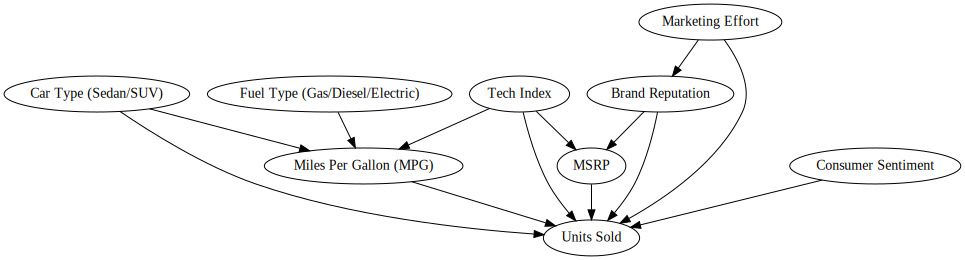

In [136]:
import graphviz

dot = graphviz.Digraph(format='png')

dot.node('Tech', 'Tech Index')
dot.node('MPG', 'Miles Per Gallon (MPG)')
dot.node('MSRP', 'MSRP')
dot.node('UnitsSold', 'Units Sold')
dot.node('BrandReputation', 'Brand Reputation')
dot.node('CarType', 'Car Type (Sedan/SUV)')
dot.node('Marketing', 'Marketing Effort')
dot.node('ConsumerSentiment', 'Consumer Sentiment')
dot.node('FuelType', 'Fuel Type (Gas/Diesel/Electric)')

dot.edge('Tech', 'UnitsSold')
dot.edge('MPG', 'UnitsSold')
dot.edge('MSRP', 'UnitsSold')
dot.edge('BrandReputation', 'MSRP')

dot.edge('CarType', 'UnitsSold')
dot.edge('CarType', 'MPG')
dot.edge('FuelType', 'MPG')

dot.edge('BrandReputation', 'UnitsSold')
dot.edge('ConsumerSentiment', 'UnitsSold')

dot.edge('Marketing', 'UnitsSold')
dot.edge('Marketing', 'BrandReputation')

dot.edge('Tech', 'MSRP')
dot.edge('Tech', 'MPG')


dot

In [137]:
alr = pd.read_csv("https://raw.githubusercontent.com/AbdurSharif/data-science-1/refs/heads/main/car.csv")

alr

,model,msrp,tech,mpg,units
0,Toyota RAV4,26915,70,29,475193
1,Honda CR-V,25970,72,28,402791
2,Nissan Rogue,25990,68,24,245724
3,Hyundai Tucson,23970,69,26,206126
4,Chevrolet Equinox,30000,70,25,207730
...,...,...,...,...,...
67,Toyota Tundra i-FORCE MAX,64500,60,22,4147
68,Audi Sportback e-tron,60000,82,77,2810
69,Land Rover Discovery,61000,68,20,6000
70,Nissan Versa,18000,45,37,29300


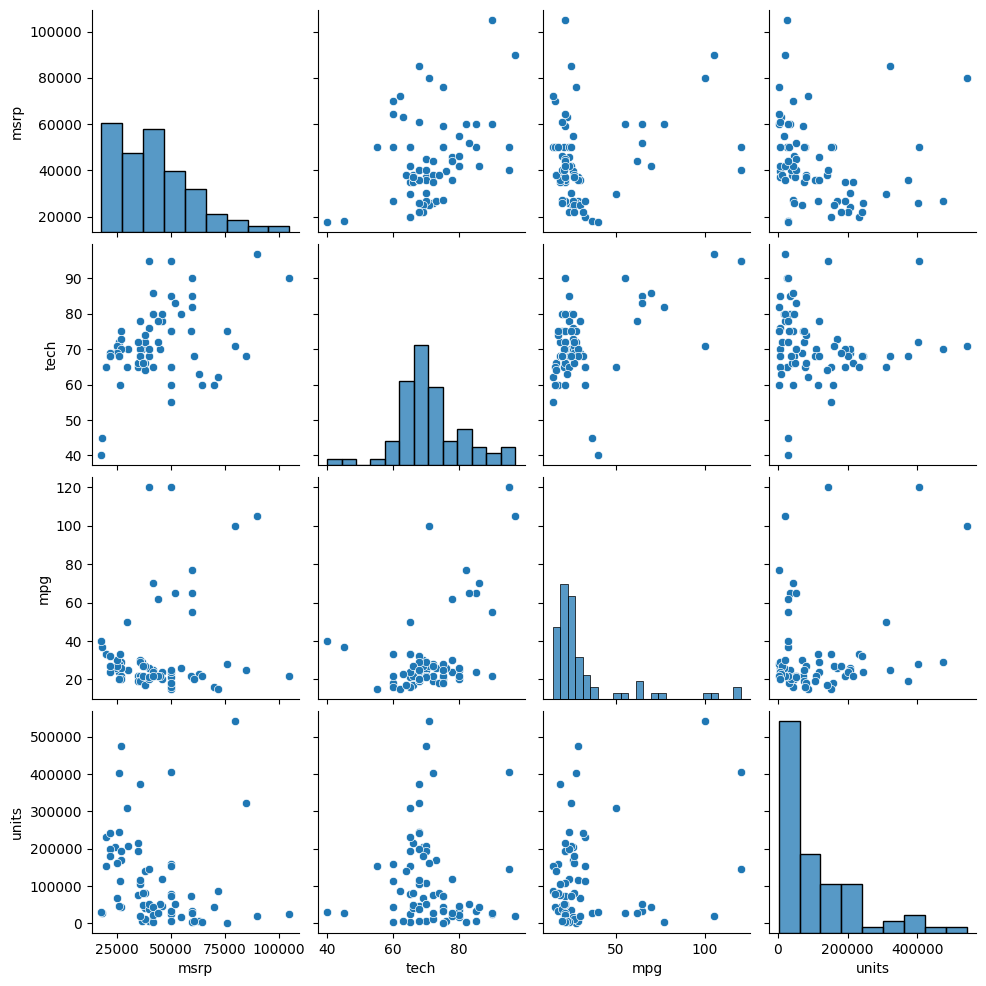

In [138]:
sns.pairplot(alr)

# Predictors Used -
I've decided on 3 main predictors to use:


* Tech Index: The tech index reflects a car’s technological features, ranging from 0 to 100. This to me seems kind of arbitrary, but puts a numerical value on things such as infotainment systems, advanced driver assistance, and connectivity options. I believe that a higher tech index often makes a car more appealing to consumers, leading to higher units sold. Cars with more advanced technology tend to attract tech-enthusiastic buyers and younger demographics who prioritize cutting-edge features. However, more tech can also mean higher prices due to more complex features being added, which could raise the price and make the car less appealing to certain budgets. Overall, though, I expect the tech index to positively correlate with units sold, as cars with more advanced technology may attract a larger customer base, especially if the features are perceived as valuable.

* Miles Per Gallon (MPG): Fuel efficiency plays a significant role in determining a car’s popularity and therefore the number of units sold. Cars with higher MPG are generally more affordable to maintain, making them more attractive to a larger portion of the market. Budget-conscious buyers and those seeking lower total cost of ownership tend to favor cars with higher fuel efficiency, leading to higher sales for these vehicles. On the other hand, sports cars and luxury vehicles with lower MPG might have lower units sold, as their appeal is more niche. I hypothesize that higher MPG will generally correlate with higher units sold, as it makes vehicles more accessible and affordable for a broader range of consumers.



* Vehicle Price (MSRP): The MSRP reflects the starting price set by the manufacturer. Typically, cars with a lower MSRP are more affordable and accessible to a larger audience, which can drive higher sales volumes. If a car is priced competitively within its market segment, it is more likely to attract a larger number of buyers, leading to higher units sold. Conversely, luxury cars with a high MSRP may have lower units sold, as they target a more specific market. I expect the MSRP to have a negative correlation with units sold: cars with lower MSRPs tend to have higher sales because they are more affordable and attract a broader customer base.








---


In [139]:
x = alr[["tech", "mpg","msrp"]]
y = alr["units"].to_numpy()

In [140]:
with pm.Model() as model_peng:
    s = pm.HalfNormal('s',1000)
    μ_ = pmb.BART("μ_", x, np.log(y), m=50)
    μ = pm.Deterministic("μ",pm.math.exp(μ_))
    y = pm.Normal("y", mu=μ, sigma=s, observed=(y))
    idata_1 = pm.sample(compute_convergence_checks=False)

Output()

Output()

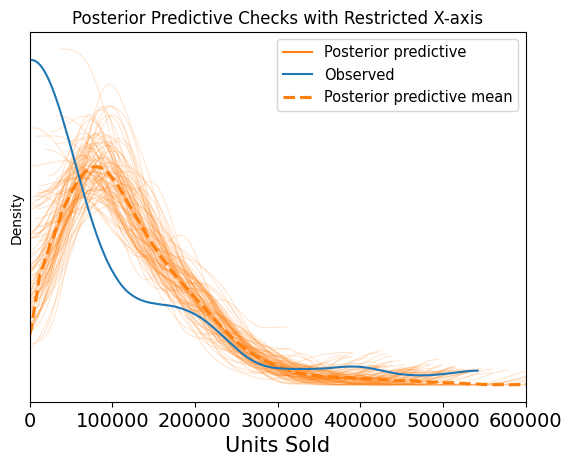

In [141]:
pm.sample_posterior_predictive(idata_1,model_peng, extend_inferencedata=True)
az.plot_ppc(idata_1, num_pp_samples=100, colors=["C1", "C0", "C1"])

plt.xlim(0, 600000)

plt.xlabel('Units Sold')
plt.ylabel('Density')
plt.title('Posterior Predictive Checks with Restricted X-axis')

plt.show()

In [142]:
x = alr[["tech", "mpg","msrp"]]
y = alr["units"].to_numpy()

In [143]:
with pm.Model() as model_peng:
    s = pm.HalfNormal('s',1000)
    μ_ = pmb.BART("μ_", x, np.log(y), m=50)
    μ = pm.Deterministic("μ",pm.math.exp(μ_))
    y = pm.LogNormal("y", mu=μ, sigma=s, observed=y)  # Use LogNormal for better fitting
    idata_2 = pm.sample(compute_convergence_checks=False)

Output()

Output()

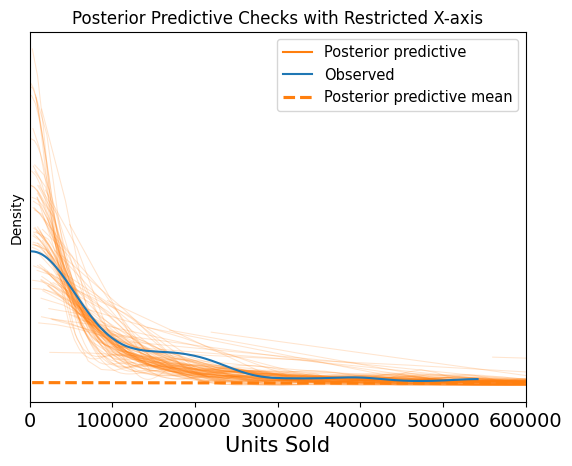

In [144]:
pm.sample_posterior_predictive(idata_2,model_peng, extend_inferencedata=True)
az.plot_ppc(idata_2, num_pp_samples=100, colors=["C1", "C0", "C1"])
plt.xlim(0, 600000)

plt.xlabel('Units Sold')
plt.ylabel('Density')
plt.title('Posterior Predictive Checks with Restricted X-axis')

plt.show()


In [190]:
x = alr[["tech","msrp"]]
y = alr["units"].to_numpy()

In [191]:
with pm.Model() as model_peng:
    s = pm.HalfNormal('s',1000)
    μ_ = pmb.BART("μ_", x, np.log(y), m=50)
    μ = pm.Deterministic("μ",pm.math.exp(μ_))
    y = pm.LogNormal("y", mu=μ, sigma=s, observed=y)
    idata_4 = pm.sample(compute_convergence_checks=False)

Output()

Output()

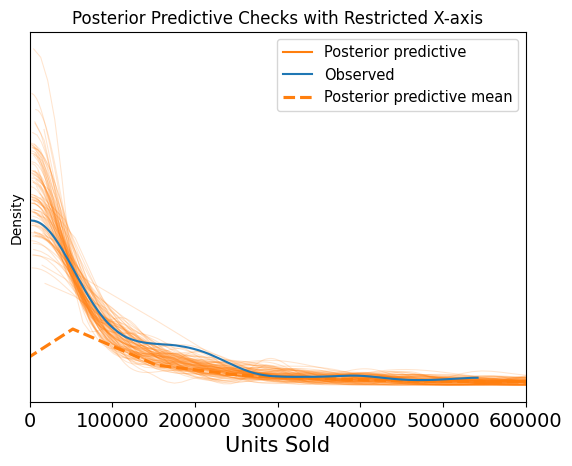

In [192]:
pm.sample_posterior_predictive(idata_4,model_peng, extend_inferencedata=True)
az.plot_ppc(idata_4, num_pp_samples=100, colors=["C1", "C0", "C1"])
plt.xlim(0, 600000)

plt.xlabel('Units Sold')
plt.ylabel('Density')
plt.title('Posterior Predictive Checks with Restricted X-axis')

plt.show()


In [193]:
x = alr[["tech", "mpg","msrp"]]
y = alr["units"].to_numpy()

In [194]:
with pm.Model() as model_peng:
    s = pm.HalfNormal('s',1000)
    μ_ = pmb.BART("μ_", x, np.log(y), m=200)
    μ = pm.Deterministic("μ",pm.math.exp(μ_))
    y = pm.LogNormal("y", mu=μ, sigma=s, observed=y)
    idata_3 = pm.sample(compute_convergence_checks=False)

Output()

Output()

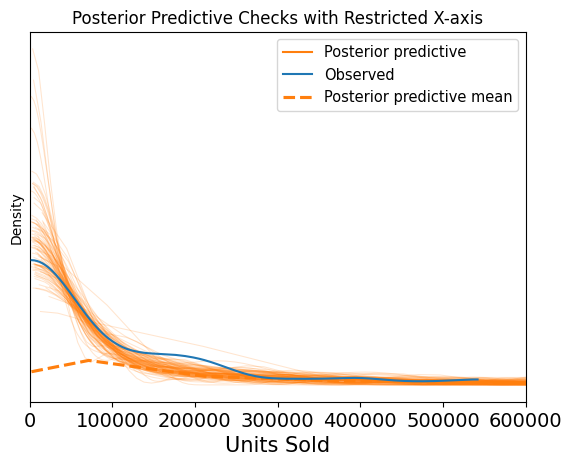

In [195]:
pm.sample_posterior_predictive(idata_3,model_peng, extend_inferencedata=True)
az.plot_ppc(idata_3, num_pp_samples=100, colors=["C1", "C0", "C1"])
plt.xlim(0, 600000)

plt.xlabel('Units Sold')
plt.ylabel('Density')
plt.title('Posterior Predictive Checks with Restricted X-axis')

plt.show()




Out of the 4 models, I would say the 3rd does the best. The first one is a disaster and no where near close, so lets ignore its existence for the rest of this project. The other 3 do follow the shape of the observed data pretty well, however the way I picked which model was the best was the variability at the starting points at the very beginning and how different the gap between the PPC and the observed data was around 200,000 units sold, where the observed data has another bump. The 4th model seemed to be the best for both categories.

(PS - named the third model idata_4 and the fourth model idata_3 by accident)

In [196]:
posterior_mean = idata_3.posterior["μ"]

μ_hdi = az.hdi(ary=idata_3, group="posterior", var_names=["μ"], hdi_prob=0.74)

pps = az.extract(
    idata_3, group="posterior_predictive", var_names=["y"]
).T


In [197]:
Xn = x.to_numpy()

/usr/local/lib/python3.11/dist-packages/arviz/plots/hdiplot.py:166: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi_data = hdi(y, hdi_prob=hdi_prob, circular=circular, multimodal=False, **hdi_kwargs)
/usr/local/lib/python3.11/dist-packages/arviz/plots/hdiplot.py:166: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi_data = hdi(y, hdi_prob=hdi_prob, circular=circular, multimodal=False, **hdi_kwargs)


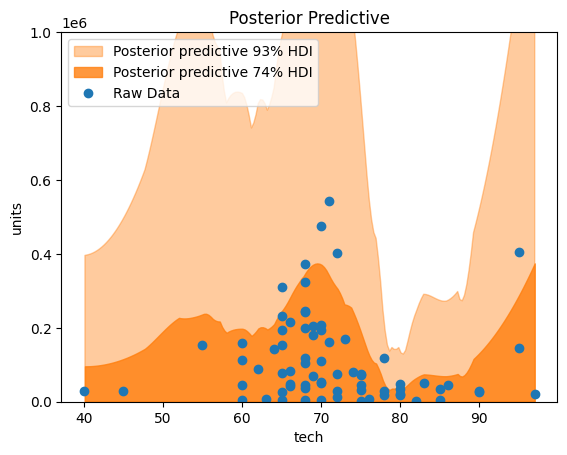

In [198]:
idx = np.argsort(Xn[:, 0])
fig, ax = plt.subplots()

az.plot_hdi(
    x=Xn[:, 0],
    y=pps,
    ax=ax,
    hdi_prob=0.93,
    fill_kwargs={"alpha": 0.4, "label": "Posterior predictive 93% HDI"}
)

az.plot_hdi(
    x=Xn[:, 0],
    y=pps,
    ax=ax,
    hdi_prob=0.74,
    fill_kwargs={"alpha": 0.8, "label": "Posterior predictive 74% HDI"}
)



ax.plot(alr["tech"], alr["units"], "o", c="C0", label="Raw Data")
ax.legend(loc="upper left")
ax.set(title="Posterior Predictive", xlabel="tech", ylabel="units")

plt.ylim(0,1000000)
plt.show()


The plot shows a weird relationship between the tech index and units sold. Cars with a tech index around 70 seem to have the highest sales, suggesting that there isn’t a straightforward positive or negative relationship between tech features and sales. Something about cars in this tech range probably have something else in common, another predictor, causing them to be so highly sought after.

At the same time, we see that electric cars with tech indexes above 90, like Teslas, are selling in large volumes. This highlights the growing popularity of electric vehicles, where the combination of high-tech features and eco-friendly benefits is driving sales. The data shows that electric cars with cutting-edge tech are a big draw for consumers, reinforcing the trend towards tech-heavy electric vehicles in the market.

Overall, we see that this is a pretty good fit -- Most of the data is within the 74% HDI and all of the data is within the 93% HDI. Although it still needs some work as the outliers are pretty far away from the other data points.

Another interesting thing I noticed was that the 3 most sold cars in 2024, the Chevy Silverado, Toyota Rav4, and Tesla Model Y, all encapsulate 3 different types of buyers in the market. Those looking for an affordable, traditional car, those into the growing market of electric cars, and those who need a practical/durable car (i.e. for blue collar work).










array([<Axes: xlabel='tech'>, <Axes: xlabel='mpg'>, <Axes: xlabel='msrp'>],
      dtype=object)

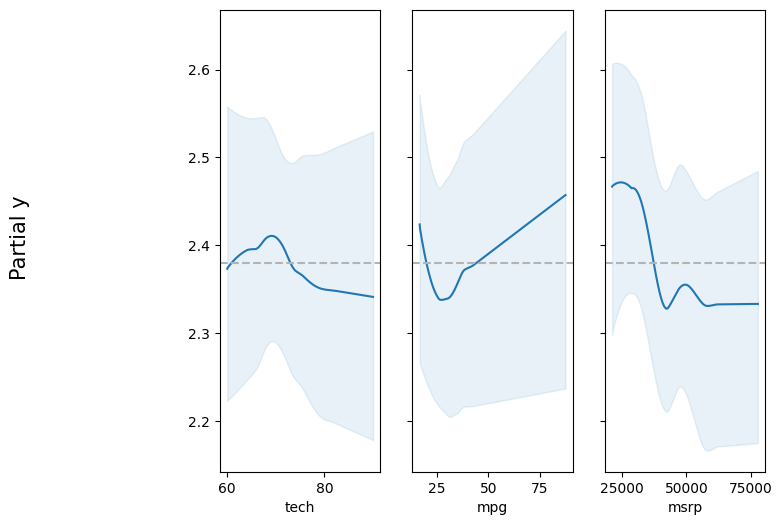

In [199]:
pmb.plot_pdp(μ_, x, y, grid=(1, 5), figsize=(12, 6))

array([<Axes: xlabel='tech'>, <Axes: xlabel='mpg'>, <Axes: xlabel='msrp'>],
      dtype=object)

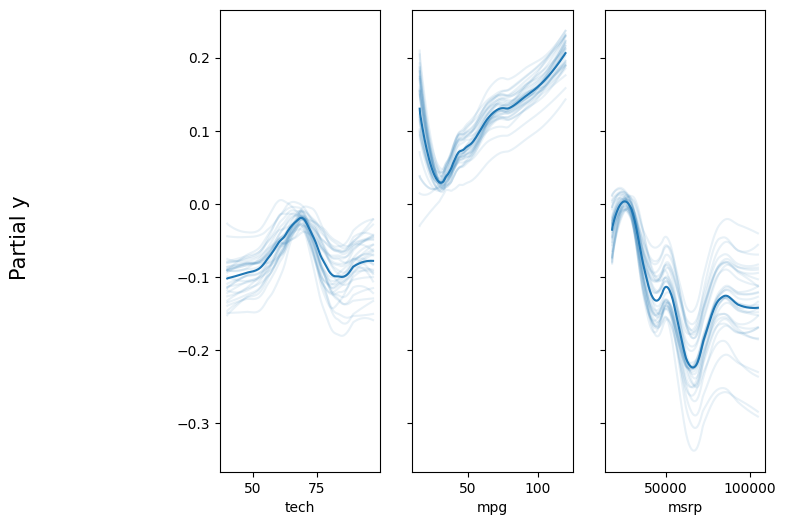

In [200]:
pmb.plot_ice(μ_, x, y, grid=(1, 5), figsize=(12, 6))

The tech index shows a slight increase in sales for cars with a tech index between 60 and 80, but after that, sales don’t increase much. This suggests that while tech features can help, they aren’t the main driver of sales. The ICE plot shows more variation, with some cars benefiting from higher tech, but others don’t follow this trend, indicating that tech alone doesn’t guarantee better sales.

For MPG, cars with moderate fuel efficiency tend to have higher sales, but the trend flattens for cars with very high MPG. The ICE plot reveals more complexity, as some cars with higher MPG see better sales, while others don’t. This confirms that extreme fuel efficiency doesn’t always lead to higher sales, and the relationship is less straightforward.

The MSRP shows a clear negative relationship with sales — as prices increase, sales tend to decrease. This is supported by the ICE plot, which shows that while higher-priced cars generally sell less, some expensive models still have good sales, likely due to factors like brand or premium features.









<Axes: ylabel='R²'>

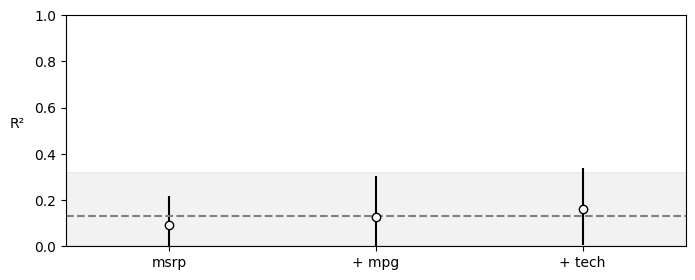

In [203]:
vi_counties = pmb.compute_variable_importance(idata_3, μ_, x)
pmb.plot_variable_importance(vi_counties)


The VI plot shows that MSRP has the highest importance in predicting units sold, adding 0.15 to the R² value. Adding MPG and tech index slightly increases the R², by about 0.05 each, but their contributions are much smaller, indicating that they have less impact on the prediction of units sold compared to MSRP. The plot demonstrates that MSRP is the dominant predictor, while MPG and tech index play a secondary role.







